[14.099999999987176, 17.600000000004002, 17.600000000004002, 37.09999999996626, 8.699999999992087, 24.09999999999863, 28.200000000006412, 11.600000000002638, 11.699999999999335, 3.2000000000007276, 16.300000000003706, 7.900000000001739, 2.2000000000005002, 1.500000000000341, 33.499999999998096, 5.200000000001182, 8.199999999992542, 1.900000000000432, 61.299999999996515, 66.60000000001514, 7.30000000000166, 14.199999999987085, 30.999999999971806, 19.00000000000432, 23.300000000005298, 29.700000000006753, 28.599999999998374, 15.999999999985448, 39.19999999996435, 2.2000000000005002, 21.20000000000482, 46.600000000010596, 27.100000000006162, 36.70000000000052, 46.70000000001062, 3.7000000000008413, 24.400000000005548, 16.40000000000373, 13.300000000003024, 47.700000000010846, 10.30000000000021, 4.19999999999618, 25.300000000005753, 13.099999999988086, 8.300000000001887, 40.30000000000916, 3.2999999999969987, 12.999999999988177, 28.80000000000655, 52.70000000001198, 30.800000000007003, 12.

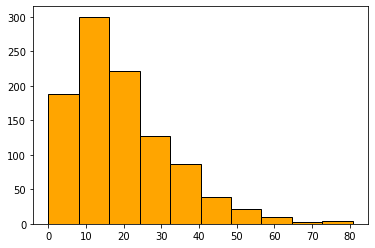

{0: 0, 2: 0.014000000000000005, 4: 0.03500000000000001, 6: 0.06500000000000003, 8: 0.06500000000000003, 10: 0.08300000000000005, 12: 0.09100000000000004, 14: 0.05500000000000003, 16: 0.07000000000000003, 18: 0.05700000000000004, 20: 0.05800000000000004, 22: 0.05500000000000003, 24: 0.051000000000000024, 26: 0.032000000000000015, 28: 0.043000000000000024, 30: 0.025000000000000015, 32: 0.029000000000000012, 34: 0.01900000000000001, 36: 0.018000000000000006, 38: 0.02500000000000001, 40: 0.02300000000000001, 42: 0.017000000000000005, 44: 0.009000000000000001, 46: 0.008, 48: 0.008, 50: 0.005, 52: 0.003, 54: 0.006, 56: 0.005, 58: 0.007, 60: 0.002, 62: 0.004, 64: 0, 66: 0, 68: 0.003, 70: 0, 72: 0, 74: 0.001, 76: 0.001, 78: 0, 80: 0.001, 82: 0.001, 84: 0, 86: 0, 88: 0, 90: 0, 92: 0, 94: 0, 96: 0, 98: 0, 100: 0, 102: 0, 104: 0, 106: 0, 108: 0, 110: 0, 112: 0, 114: 0, 116: 0, 118: 0, 120: 0, 122: 0, 124: 0, 126: 0, 128: 0, 130: 0, 132: 0, 134: 0, 136: 0, 138: 0, 140: 0, 142: 0, 144: 0, 146: 0, 1

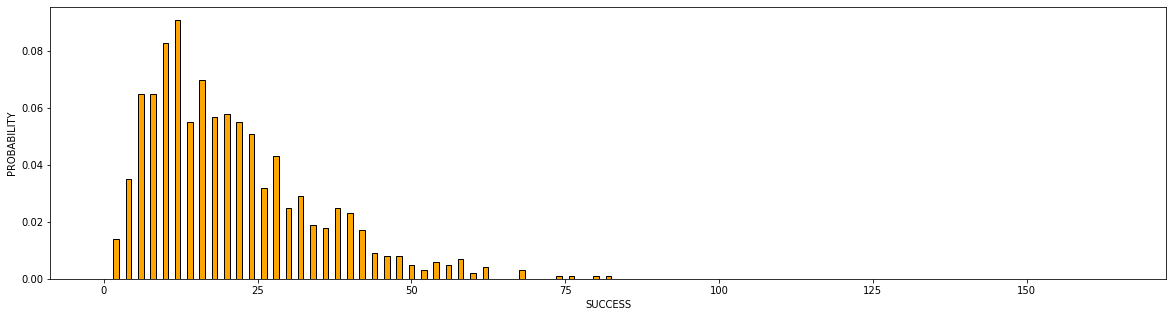

In [149]:
# Roll.n. 2103114
# Import libraries
import random
from matplotlib import pyplot as plt

num_t,t_minutes = 1000,24*60 # total minutes in a day(24hour) so minutes 25*60 minutes
l1_min_inverse = 1/10  # 1 bus in every 10 minutes 
del_t = 0.1
n_t_lst = []
for i in range(num_t): # Noted computations and time trials
  last_arrival_t,t = 0,0
  inspection_t = random.uniform(0,t_minutes)
  while (t < t_minutes):
    t += del_t
    if (random.uniform(0,1) < l1_min_inverse * del_t):
      next_arrival_t = t
      if (inspection_t < t):
        break;
      last_arrival_t = t;
  n_t_lst += [next_arrival_t - last_arrival_t]

print(n_t_lst)
S = 0
for i in n_t_lst:
  S += i
# Mean interarrival time as per the inspector
mean_noted_t_lst = S / num_t
print("MEAN INTERARRIVAL TIME : "+ str(mean_noted_t_lst)) 
print("THIS VALUE IS TWICE OF THE ORIGINAL VALUE OF "+ str(1 / l1_min_inverse))

set_noted_t = set(n_t_lst) # graphing by storing the discovered values in a dictionary
dict_noted_t = {}
for i in set_noted_t:
  dict_noted_t[i] = 0;
for i in n_t_lst:
  dict_noted_t[i] += 1/num_t
plt.hist(n_t_lst , color='orange', edgecolor = 'black') 
plt.show()
bin_width = 2 # Here plot data in given intervals( from variable )
bin_max = max(set_noted_t)
n_bins = 0
while (n_bins < bin_max):
  n_bins += bin_width

dict_p = {} # Here Calculating the probability for each bin
for i in range(0,n_bins + 1):
  dict_p[i * bin_width] = 0
for i in dict_p.keys():
  for j in dict_noted_t.keys():
    if (i - bin_width < j and j < i):
      dict_p[i] += dict_noted_t[j]
print(dict_p)

# Ploting the graph for the above computation
x_axis= list(dict_p.keys()) # list all arrival values on x axis
y_axis= list(dict_p.values()) # list all arrival values on y axis
plt.figure(figsize=(20, 5))
plt.bar(x_axis,y_axis,color='orange',edgecolor='black',width=0.9)
plt.xlabel("SUCCESS")  # Print "SUCCESS" on y axis
plt.ylabel("PROBABILITY") # Print "probability" on y axis
plt.show()

